In [ ]:
!nvidia-smi

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from DataLoader import DataLoader
from model.MLP import MLP_Tuner
from model.CNNTransformer import CNNTransformer_Tuner

device = 'cuda' if torch.cuda.is_available() else 'cpu'

import kagglehub

# Download latest version
path = kagglehub.dataset_download("samiraalipour/genomics-of-drug-sensitivity-in-cancer-gdsc")

print("Path to dataset files:", path)

dataloader = DataLoader(path + '/GDSC_DATASET.csv',
                        path + '/Compounds-annotation.csv',
                        path + '/GDSC2-dataset.csv',
                        path + '/Cell_Lines_Details.xlsx')

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, input_dim = dataloader.get_data()

Path to dataset files: /home/andrew-root/.cache/kagglehub/datasets/samiraalipour/genomics-of-drug-sensitivity-in-cancer-gdsc/versions/2
Loading Done!
Preprocess Done!
Define Done!


## ML

In [ ]:
# Initialize the tuner
MLP_tuner = MLP_Tuner(input_dim)

# Tune hyperparameters
best_model = MLP_tuner.tune_hyperparameters(X_train_tensor, y_train_tensor)

In [ ]:
# Evaluate the best model on the test set
train_losses = []
val_losses = []

for epoch in range(best_model.max_epochs):
    best_model.partial_fit(X_train_tensor, y_train_tensor)
    train_pred = best_model.predict(X_train_tensor).squeeze()
    val_pred = best_model.predict(X_test_tensor).squeeze()
    train_loss = mean_squared_error(y_train_tensor.numpy(), train_pred)
    val_loss = mean_squared_error(y_test_tensor.numpy(), val_pred)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

In [ ]:
# Plot training and validation loss to check for overfitting
plt.figure(figsize=(10, 6))
plt.plot(range(1, best_model.max_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, best_model.max_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the best model on the test set
# best_model.eval()
with torch.no_grad():
    predictions = best_model.predict(X_test_tensor).squeeze()
    predictions = torch.tensor(predictions)    
    
    # Calculate RMSE, MAE, and MSE
    rmse = torch.sqrt(nn.MSELoss()(predictions, y_test_tensor)).item()
    mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())
    mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
    
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test MSE: {mse:.4f}")

## DL

In [2]:
# Initialize the tuner
CNNTransformer_tuner = CNNTransformer_Tuner(input_dim)

# Tune hyperparameters
best_model = CNNTransformer_tuner.tune_hyperparameters(X_train_tensor, y_train_tensor)

  epoch    train_loss     dur
-------  ------------  ------
      1        8.0741  1.7237
  epoch    train_loss     dur
-------  ------------  ------
      1        8.1199  1.8497
  epoch    train_loss     dur
-------  ------------  ------
      1        8.0753  1.9831
      2        8.0273  1.7433
      2        8.0816  1.7297
      2        8.0377  1.7245
      3        8.0175  1.7305
      3        8.0760  1.7376
      3        8.0273  1.7138
      4        8.0166  1.7235
      4        8.0763  1.7234
      4        8.0311  1.7139
      5        8.0188  1.7134
      5        8.0765  1.7268
      5        8.0298  1.7274
      6        8.0149  1.7271
      6        8.0723  1.7336
      6        8.0281  1.7353
      7        8.0129  1.7389
      7        8.0741  1.7235
      7        8.0339  1.7125
      8        8.0148  1.7720
      8        8.0707  1.6932
      8        8.0283  1.7130
      9        8.0143  1.7757
      9        8.0748  1.7417
      9        8.0266  1.7397
     10   

In [3]:
train_losses = []
val_losses = []

for epoch in range(1): # best_model.max_epochs
    best_model.partial_fit(X_train_tensor, y_train_tensor)
    train_pred = best_model.predict(X_train_tensor).squeeze()
    val_pred = best_model.predict(X_test_tensor).squeeze()
    train_loss = mean_squared_error(y_train_tensor.numpy(), train_pred)
    val_loss = mean_squared_error(y_test_tensor.numpy(), val_pred)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

     31        8.0328  3.0765
     32        8.0346  3.1850
     33        8.0320  3.1510
     34        8.0317  3.1401
     35        8.0304  3.1555
     36        8.0310  3.1028
     37        8.0325  3.2096
     38        8.0314  3.1919
     39        8.0332  3.1775
     40        8.0314  3.3481
     41        8.0306  3.1328
     42        8.0332  3.2568
     43        8.0328  3.2456
     44        8.0314  3.1929
     45        8.0306  3.2794
     46        8.0332  3.1150
     47        8.0329  3.1878
     48        8.0298  3.2300
     49        8.0326  3.3083
     50        8.0333  3.2244
     51        8.0317  3.1499
     52        8.0296  3.2245
     53        8.0316  3.2217
     54        8.0329  3.1408
     55        8.0313  3.2850
     56        8.0323  3.1237
     57        8.0311  3.1864
     58        8.0311  3.1841
     59        8.0312  3.1166
     60        8.0318  3.2771


ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

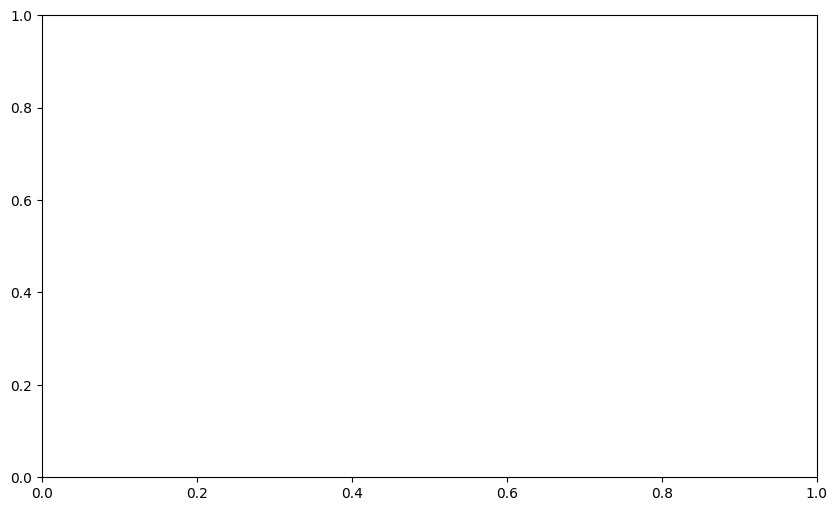

: 

In [ ]:
# Plot training and validation loss to check for overfitting
plt.figure(figsize=(10, 6))
plt.plot(range(1, best_model.max_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, best_model.max_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the best model on the test set
# best_model.eval()
with torch.no_grad():
    predictions = best_model.predict(X_test_tensor).squeeze()
    predictions = torch.tensor(predictions)    
    
    # Calculate RMSE, MAE, and MSE
    rmse = torch.sqrt(nn.MSELoss()(predictions, y_test_tensor)).item()
    mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())
    mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
    
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test MSE: {mse:.4f}")